# NBA Stats and Salaries Analysis

Can we tell which players make above league average just by looking at their stats? Of course looking at the stats of players like LeBron James, Steph Curry and James Harden we can clearly see that their stats dictate that they make above league average salary. However, what about players like Carmelo Anthony, Kevin Love or LaMarcus Aldridge? The goal of my project is to analyze the statistics of the 2020-2021 season and construct a machine learning model that can predict whether players made above or below the league average of $7,689,656. In addition and most importantly, the machine learning model is making a judgement on whether that player earned below or above league average based on stats. The question I want to answer is, which players deserved to be paid more the NBA average league salary and which players deserved to be paid less. Essentially, wherever the prediction model disagrees with the player's actual salary, it is saying that this player outperformed or underperformed their contract. I think this debate is interesting and can make or break a case as to why a player should be earning more or less next year if their contract is not already guaranteed for the 2021-2022 season.  

In [24]:
import sys
import os
os.chdir('C:\\Users\\wally')
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score, log_loss,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib import lines as plt_lines
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
os.chdir('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts')

In [25]:
ss = pd.read_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\basketball\\NBA Stats and Salaries merge csv file.csv')
ss = ss.rename(columns = {'salary_above_average': 'salary'})

In [100]:
ss_aa = ss.loc[[1, 3, 44, 69, 150, 155, 245, 360, 398, 427]]
ss_bb = ss.loc[[2, 11, 84, 147, 228, 278, 350, 368, 397, 436]]
ss_bb_aa = ss.loc[[2, 11, 84, 147, 228, 278, 350, 368, 397, 436, 1, 3, 44, 69, 150, 155, 245, 360, 398, 427]]

In [26]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rk                439 non-null    int64  
 1   player_name       439 non-null    object 
 2   Pos               439 non-null    object 
 3   Age               439 non-null    int64  
 4   Tm                439 non-null    object 
 5   G                 439 non-null    int64  
 6   GS                439 non-null    int64  
 7   MP                439 non-null    int64  
 8   FG                439 non-null    int64  
 9   FGA               439 non-null    int64  
 10  FG%               439 non-null    float64
 11  3P                439 non-null    int64  
 12  3PA               439 non-null    int64  
 13  3P%               439 non-null    float64
 14  2P                439 non-null    int64  
 15  2PA               439 non-null    int64  
 16  2P%               439 non-null    float64
 1

    Variable Description:
    RK = Alphabetical Rank Among Players
    player_name = Player Name
    Pos = Player Position
    Age = Age
    Tm = Team
    G = Games Played
    GS = Games Started
    MP = Minutes Played
    FG = Field Goals Made
    FGA = Field Goals Attempted
    FG% = Field Goal Percentage
    3P = 3 Pointers Made
    3PA = 3 Pointers Attempted
    3P% = 3 Point Percentage
    2P = 2 Pointers Made
    2PA = 2 Pointers Attempted
    2P% = 2 Point Percentage
    eFG% = Effective Field Goal Percentage (Adjusts for 3 points being 1 more point than two pointers)
    FT = Free Throws Made
    FTA = Free Throws Attempted
    FT% = Free Throw Percentage
    ORB = Offensive Rebounds
    DRB = Defensive Rebounds
    TRB = Total Rebounds
    AST = Assists
    STL = Steals
    BLK = Blocks
    TOV = Turnovers
    PF = Personal Fouls
    PTS = Points
    salary_rank = Rank based on salary for 2020-21 season
    salary_20-21 = Salary for 2020-21 season
    salary_21-22 = Salary for 2021-22 season
    signed_using = Type of contract
    guaranteed_money = Guaranteed money for length of contract
    salary = Indicates whether the player earns more than 7689656 USD for the 2020-21 season. 1 = Above Average, 0 = Below Average

Story: Can we figure out based on stats, who makes above league average? We will purposely choose 10 players who make above league average and 10 players who make below league average but whose stats make it difficult for a model to determine who makes above league average and below league average.

Description of our group of players to hone in on: 10 above average players(of those players, 5 players 


Trae Young(0), D'Angelo Russell(1), Kevin Love(1), Bam Adebayo(0), Donovan Mitchell(0), Gary Trent Jr.(0), LaMarcus Aldridge(1), Kyle Kuzma(0), Carmelo Anthony(0), Draymond Green(1), Steven Adams(1), Blake Griffin(1), Kentavious-Caldwell Pope(1), Devonta Graham(0), Duncan Robinson(0), John Collins(0), Collin Sexton(0), Zion Williamson(1), Bogdan Bogdanović(1), P.J. Tucker(1)


If you don't already know, most of the NBA players earn below league average salary. If the NBA is a car, the superstars are the engine but role players are the tires. You need a lot of them and the car isn't going anywhere without them. As you can see below, players who play for less than league average salary, outnumber their higher paid counterparts nearly 2:1.

Text(0.5, 1.0, 'Number of Players Paid Above & Below League Average')

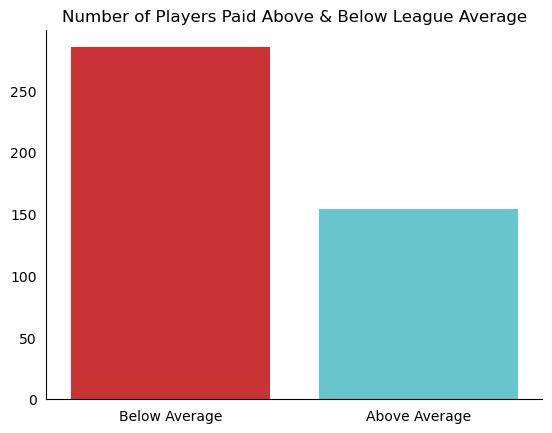

In [138]:
plt.style.use('default')
cp = sns.countplot(x = 'salary', data = ss, palette = hlsg_r)
cp.set(xlabel = '', ylabel = '')
cp.spines['right'].set_visible(False)
cp.spines['top'].set_visible(False)
plt.tick_params(bottom=0, left=0)
cp.xaxis.set_ticklabels(['Below Average', 'Above Average'])
plt.title('Number of Players Paid Above & Below League Average')

The combined salaries of all the players in the NBA in the 2020-2021 season was 3,669,787,369 USD. Although there are many more players that are paid below league average. The players total salaries who are paid below average, only make up 23% of the number above. That means that all the players salaries who make below league average combined to 843,722,530 USD.  77% of the players total salaries are paid to the few players who make above league average. This means that all the salaries of the players who make above league average combined to 2,826,064,839 USD.  This indicates a very top heavy pay scale. About one third of the players in the league make 77% of the total salaries.

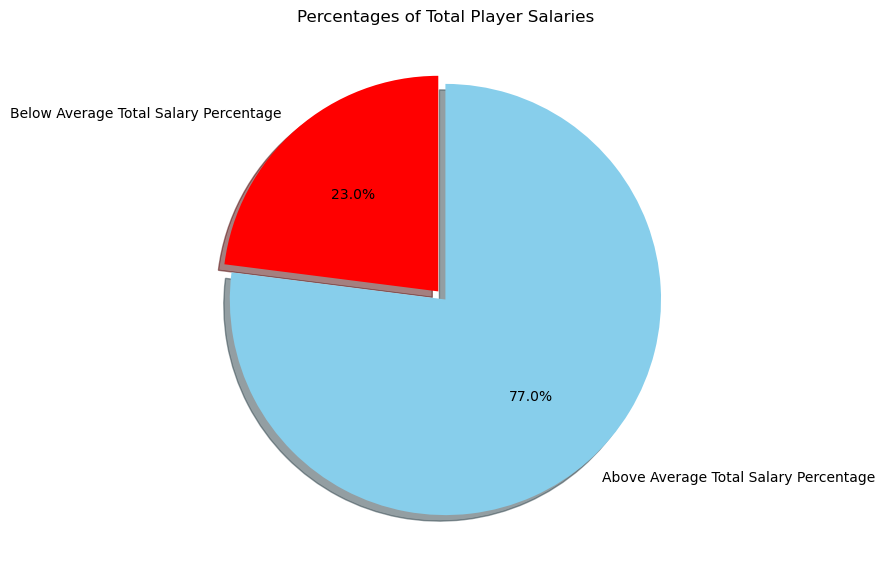

In [194]:
total_salary_aa = ss[ss['salary'] == 1]['salary_20-21'].sum()
total_salary_ba = ss[ss['salary'] == 0]['salary_20-21'].sum()
labels = ['Below Average Total Salary Percentage', 'Above Average Total Salary Percentage']
sizes = [total_salary_ba,total_salary_aa]

colors = ['red','skyblue']
explode = (0.05, 0)

pie = plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode ,labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle= 90)

pie.set_facecolor('white')
plt.title('Percentages of Total Player Salaries')
plt.show()

You might think to yourself, well that doesn't seem fair. Why should a select few make all the money? Looking at the distributions below we see that the players who make above league average are normally responsible for most of the highlight plays, points, etc. The NBA is a league, which need role players but is built on stars.

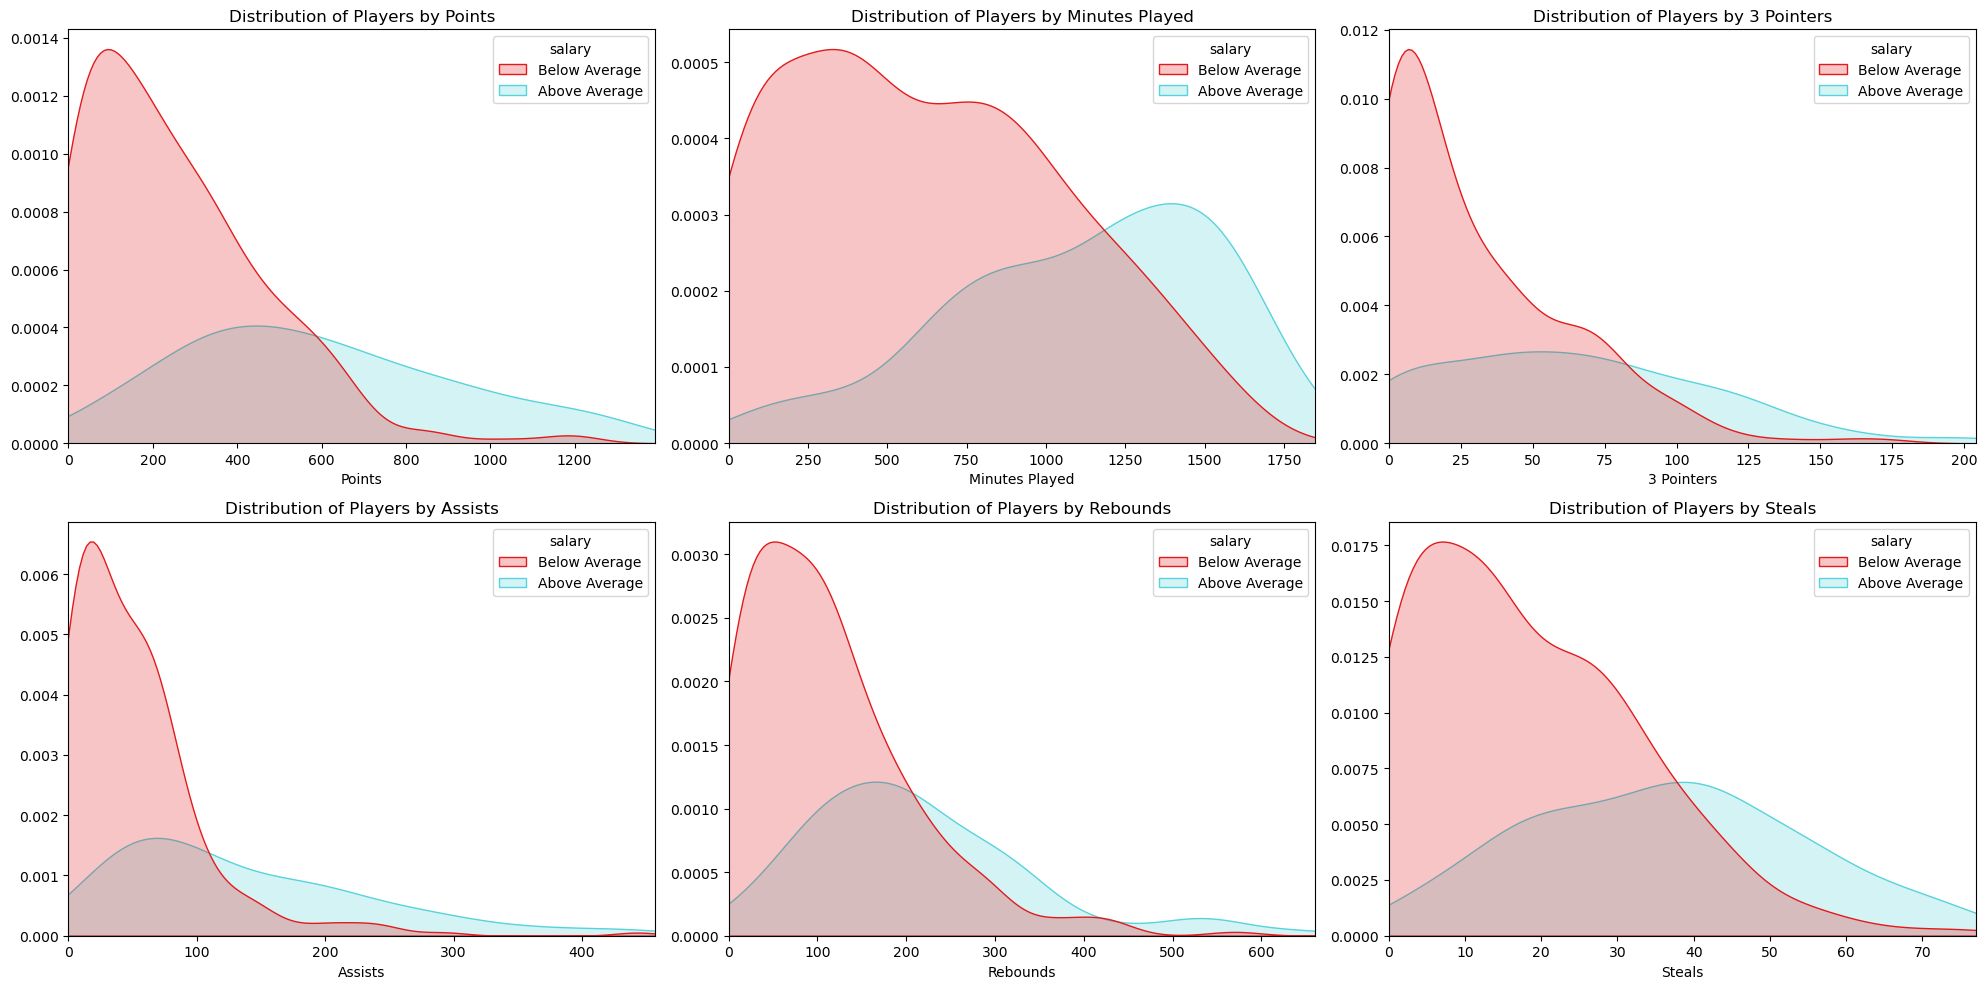

In [185]:
fig, axx = plt.subplots(2,3, figsize = (20,10))
legend_map = {0: 'Below Average', 1: 'Above Average'}

axx[0,0].set_title('Distribution of Players by Points')
sns.kdeplot(x = 'PTS', hue = ss['salary'].map(legend_map) , data = ss, ax = axx[0,0], shade = True,  palette = hlsg_r)
max_pts = ss['PTS'].max()
axx[0,0].set(xlim = (0,max_pts))
axx[0,0].set(xlabel = 'Points', ylabel = "")

axx[0,1].set_title('Distribution of Players by Minutes Played')
sns.kdeplot(x = 'MP', hue = ss['salary'].map(legend_map), data = ss, ax = axx[0,1], shade = True, palette = hlsg_r)
max_mp = ss['MP'].max()
axx[0,1].set(xlim = (0,max_mp))
axx[0,1].set(xlabel = 'Minutes Played', ylabel = "")

axx[0,2].set_title('Distribution of Players by 3 Pointers')
sns.kdeplot(x = '3P', hue = ss['salary'].map(legend_map), data = ss, ax = axx[0,2], shade = True, palette = hlsg_r)
max_3P = ss['3P'].max()
axx[0,2].set(xlim = (0,max_3P))
axx[0,2].set(xlabel = '3 Pointers', ylabel = "")

axx[1,0].set_title('Distribution of Players by Assists')
sns.kdeplot(x = 'AST', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,0], shade = True, palette = hlsg_r)
max_AST = ss['AST'].max()
axx[1,0].set(xlim = (0,max_AST))
axx[1,0].set(xlabel = 'Assists', ylabel = "")

axx[1,1].set_title('Distribution of Players by Rebounds')
sns.kdeplot(x = 'TRB', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,1], shade = True, palette = hlsg_r)
max_TRB = ss['TRB'].max()
axx[1,1].set(xlim = (0,max_TRB))
axx[1,1].set(xlabel = 'Rebounds', ylabel = "")

axx[1,2].set_title('Distribution of Players by Steals')
sns.kdeplot(x = 'STL', hue = ss['salary'].map(legend_map), data = ss, ax = axx[1,2], shade = True, palette = hlsg_r)
max_STL = ss['STL'].max()
axx[1,2].set(xlim = (0,max_STL))
axx[1,2].set(xlabel = 'Steals', ylabel = "")

fig.set_facecolor('white')
plt.tight_layout()

If you know anything about the NBA, you might have heard names like LeBron James, Steph Curry, etc. We know these players are making money and rightfully so. However, which of the players below did you know are making above league average salary and below league average salary?

<ipython-input-140-fd63c338a3bb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx[0].xaxis.set_ticklabels([0,1,2,3,4,5,6])
<ipython-input-140-fd63c338a3bb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx[1].xaxis.set_ticklabels([0,5,10,15,20,25,30,35])


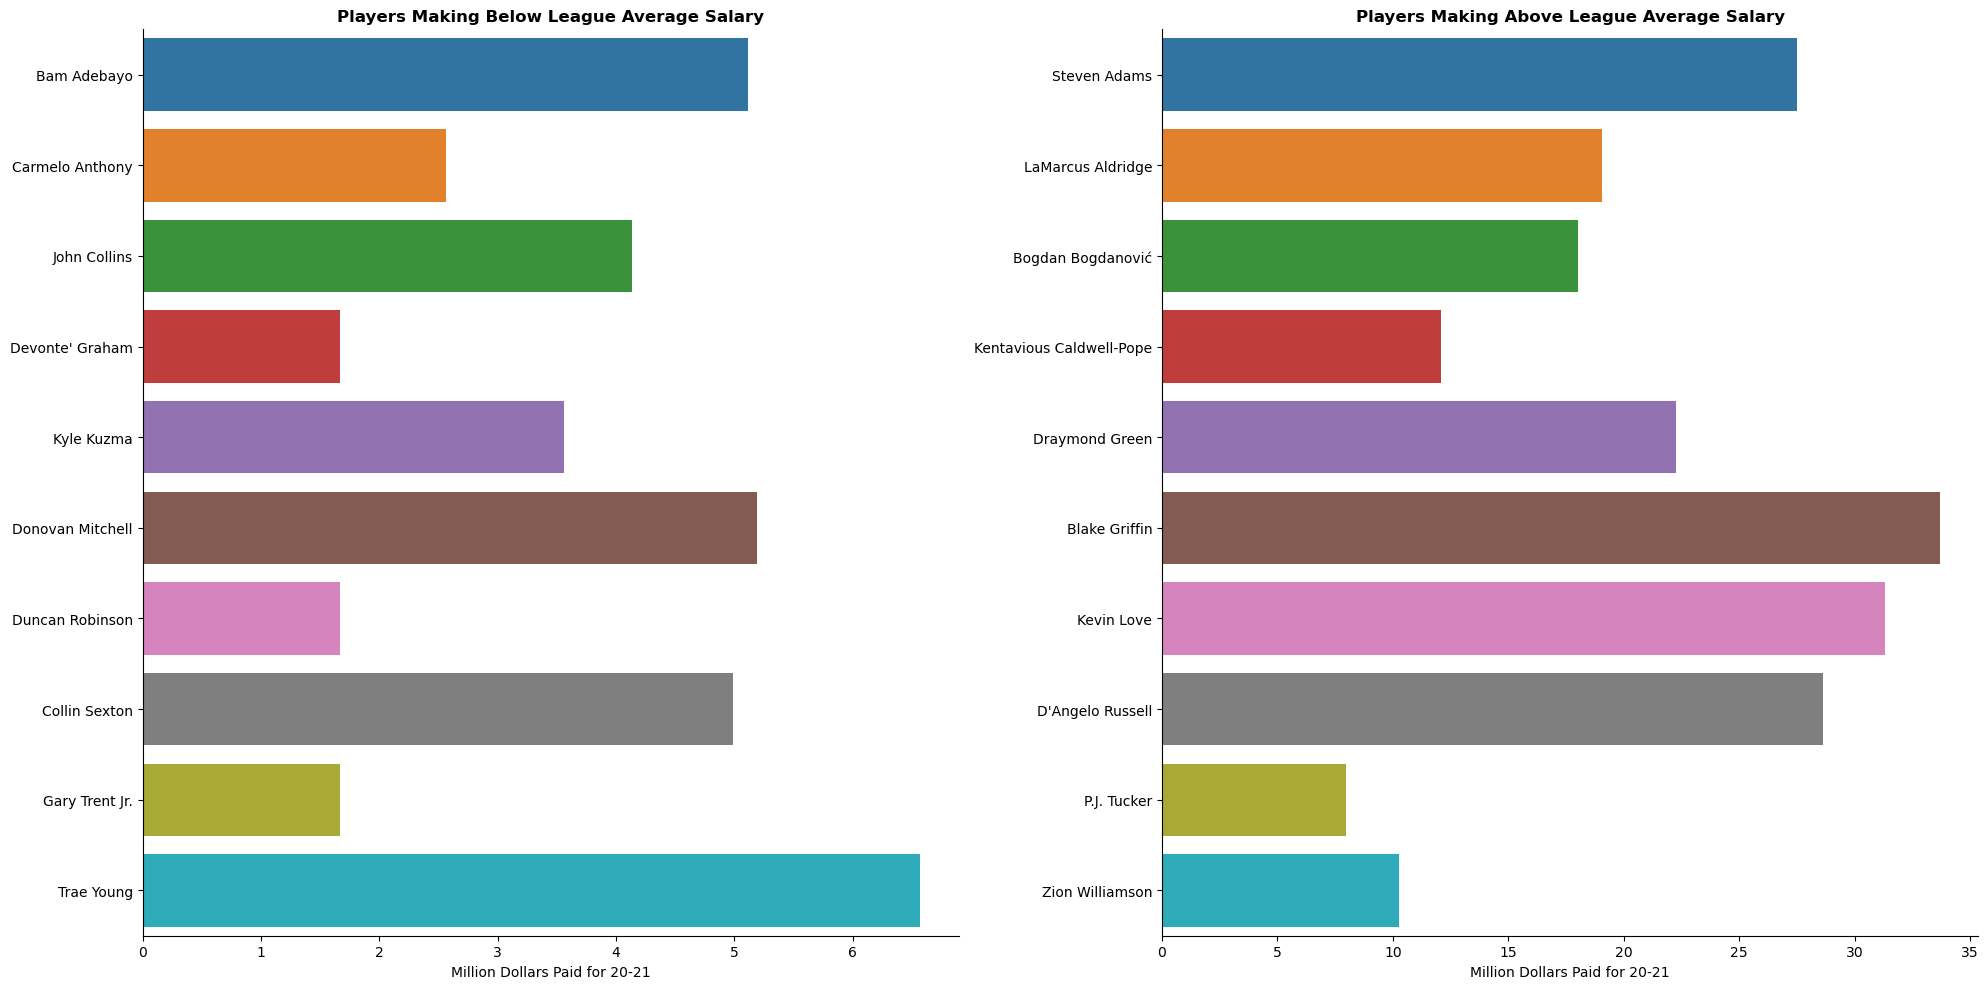

In [140]:
fig, axx = plt.subplots(1,2, figsize = (20,10))
axx[0].set_title('Players Making Below League Average Salary', weight = 'bold')
sns.barplot(y = 'player_name', x = 'salary_20-21', data = ss_bb, ax = axx[0])
axx[0].spines['right'].set_visible(False)
axx[0].spines['top'].set_visible(False)
axx[0].set(xlabel = "Million Dollars Paid for 20-21", ylabel = "")
axx[0].xaxis.set_ticklabels([0,1,2,3,4,5,6])
axx[1].set_title('Players Making Above League Average Salary', weight= 'bold')
sns.barplot(y = 'player_name', x = 'salary_20-21', data = ss_aa, ax = axx[1])
axx[1].xaxis.set_ticklabels([0,5,10,15,20,25,30,35])
axx[1].set(xlabel = "Million Dollars Paid for 20-21", ylabel = "")
axx[1].spines['right'].set_visible(False)
axx[1].spines['top'].set_visible(False)
fig.set_facecolor('white')
plt.tight_layout()

These 20 players above, are players we are going to take a closer look at to see if the prediction model should rank them differently. Should players like Carmelo Anthony be making above league average salary? Should players like Blake Griffin be making below league average salary?

First let's take a look at the league's stats as a whole and then at these players. Below we can see players who were paid more, typically played more games and more minutes.

Text(0.5, 1.0, 'Games, Minutes Played and Salary Rank')

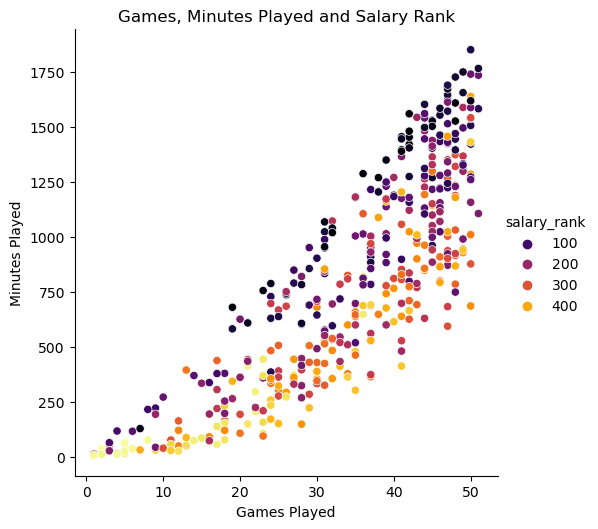

In [141]:
gmp = sns.relplot(x = 'G', y = 'MP', hue = 'salary_rank', data = ss, palette = 'inferno')
gmp.set(xlabel = "Games Played", ylabel = "Minutes Played")
plt.title('Games, Minutes Played and Salary Rank')

A few things that jump out. The Miami Heat have gotten incredible value from Duncan Robinson, he is one of the lowest paid, yet has played more games and minutes than any of the players from this group. Kevin Love has barely played at all, so hopefully that will be a pretty easy one for the prediction model. Many of these higher paid players have played many minutes this season, we will see if the prediction model disagrees with what they're paid or accepts their salary.

Text(3    19.0
Name: G, dtype: float64, 3    674.0
Name: MP, dtype: float64, 'Aldridge')

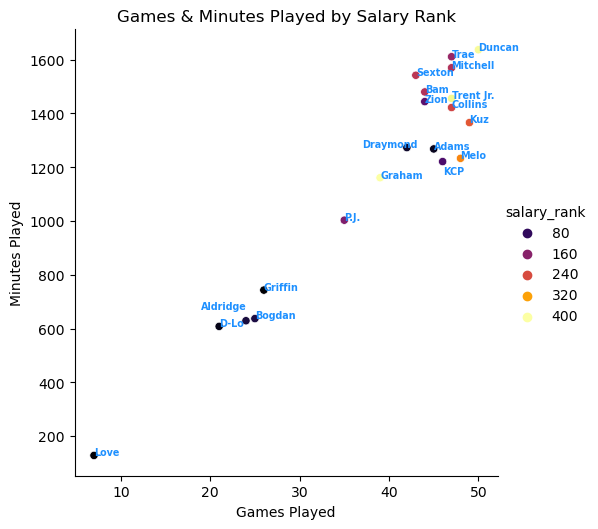

In [153]:
gmp_t = sns.relplot(x = 'G', y = 'MP', hue = 'salary_rank', data = ss_bb_aa, palette = 'inferno')
plt.title('Games & Minutes Played by Salary Rank')
gmp_t.set(xlabel = "Games Played", ylabel = "Minutes Played")
aa_names = ['Steven Adams','Bogdan Bogdanović','Blake Griffin','Kevin Love',"D'Angelo Russell",'P.J. Tucker','Zion Williamson', 'Bam Adebayo', 'Carmelo Anthony', 'John Collins', "Devonte' Graham", 'Kyle Kuzma', 'Donovan Mitchell', 'Duncan Robinson', 'Collin Sexton', 'Gary Trent Jr.', 'Trae Young']
nick = ['Adams','Bogdan','Griffin','Love','D-Lo','P.J.','Zion', 'Bam', 'Melo', 'Collins', 'Graham', 'Kuz', 'Mitchell', 'Duncan', 'Sexton', 'Trent Jr.', 'Trae']
for i,j in zip(aa_names, nick):
    plt.text(ss_bb_aa.G[ss_bb_aa.player_name == i], ss_bb_aa['MP'][ss_bb_aa.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small')
plt.text(ss_bb_aa.G[ss_bb_aa.player_name == 'Kentavious Caldwell-Pope'], ss_bb_aa['MP'][ss_bb_aa.player_name == 'Kentavious Caldwell-Pope']-45.0, 'KCP', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa.G[ss_bb_aa.player_name == 'Draymond Green']-5.0, ss_bb_aa['MP'][ss_bb_aa.player_name == 'Draymond Green'], 'Draymond', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa.G[ss_bb_aa.player_name == 'LaMarcus Aldridge']-5.0, ss_bb_aa['MP'][ss_bb_aa.player_name == 'LaMarcus Aldridge']+45.0, 'Aldridge', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 

Being efficient is one of the most important qualities a player can have. There's a limited amount of shots in any given game and the players who can maximize points are typically the players who dominate. Below there's not a whole lot that we can gather except that players who have higher percentages in one area, tend to have higher percentages in others.

Text(0.5, 1.0, 'Shooting Efficiency Stats')

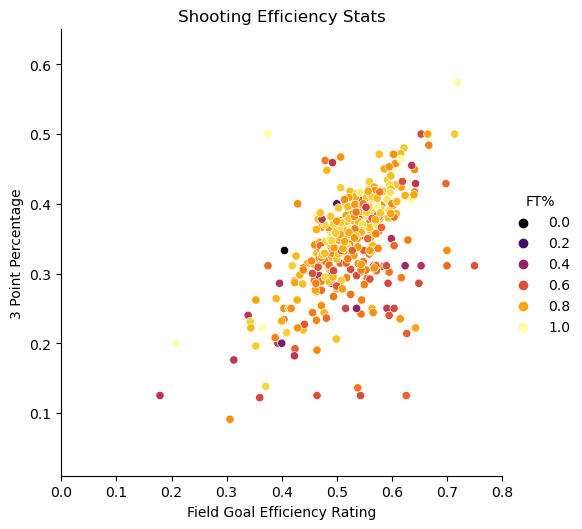

In [177]:
ax = sns.relplot(x = 'eFG%', y = '3P%', hue = 'FT%', data = ss, palette = 'inferno')
ax.set(ylabel = "3 Point Percentage", xlabel = "Field Goal Efficiency Rating")
plt.ylim(0.01, 0.65)
plt.xlim(0.0,0.8)
plt.title('Shooting Efficiency Stats')

Looking at this plot, one thing that jumps out is Steven Adams. He doesn't take many three pointers, only at the end of buzzers, just heaving it, yet he is the most efficient scorer. This means, he doesn't waste possessions doing things he can't do. Zion is also very efficient. Draymond Green, Kevin Love, Blake Griffin and P.J Tucker haven't exactly been lighting the league on fire this year in terms of scoring and this plot reflects that. However, there are different ways to affect the game. 

Text(147    0.48
Name: eFG%, dtype: float64, 147    0.372
Name: 3P%, dtype: float64, 'Graham')

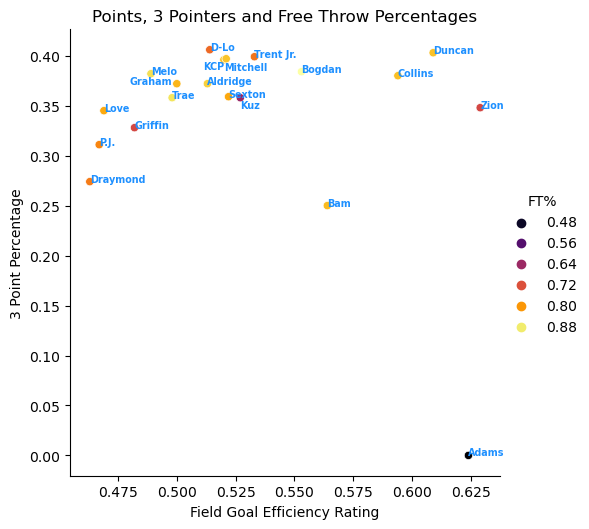

In [178]:
ax = sns.relplot(x = 'eFG%', y = '3P%', hue = 'FT%', data = ss_bb_aa, palette = 'inferno')
plt.title('Points, 3 Pointers and Free Throw Percentages')
ax.set(ylabel = "3 Point Percentage", xlabel = "Field Goal Efficiency Rating")
aa_names = ['Steven Adams','Bogdan Bogdanović','Draymond Green','Blake Griffin','Kevin Love',"D'Angelo Russell",'P.J. Tucker','Zion Williamson', 'Bam Adebayo', 'Carmelo Anthony', 'John Collins', 'Duncan Robinson', 'Collin Sexton', 'Trae Young']
nick = ['Adams','Bogdan','Draymond','Griffin','Love','D-Lo','P.J.','Zion', 'Bam', 'Melo', 'Collins', 'Duncan', 'Sexton', 'Trae']
for i,j in zip(aa_names, nick):
    plt.text(ss_bb_aa['eFG%'][ss_bb_aa.player_name == i], ss_bb_aa['3P%'][ss_bb_aa.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small')
plt.text(ss_bb_aa['eFG%'][ss_bb_aa.player_name == 'Kentavious Caldwell-Pope']-0.01, ss_bb_aa['3P%'][ss_bb_aa.player_name == 'Kentavious Caldwell-Pope']-0.01, 'KCP', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa['eFG%'][ss_bb_aa.player_name == 'Kyle Kuzma'], ss_bb_aa['3P%'][ss_bb_aa.player_name == 'Kyle Kuzma']-0.01, 'Kuz', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa['eFG%'][ss_bb_aa.player_name == 'LaMarcus Aldridge'], ss_bb_aa['3P%'][ss_bb_aa.player_name == 'LaMarcus Aldridge'], 'Aldridge', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa['eFG%'][ss_bb_aa.player_name == 'Gary Trent Jr.'], ss_bb_aa['3P%'][ss_bb_aa.player_name == 'Gary Trent Jr.'], 'Trent Jr.', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa['eFG%'][ss_bb_aa.player_name == 'Donovan Mitchell'], ss_bb_aa['3P%'][ss_bb_aa.player_name == 'Donovan Mitchell']-0.01, 'Mitchell', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa['eFG%'][ss_bb_aa.player_name == "Devonte' Graham"]-0.02, ss_bb_aa['3P%'][ss_bb_aa.player_name == "Devonte' Graham"], 'Graham', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 

Offense is what puts people in the seats and as we see most players average about 370 points, 81 assists and 56 free throws. We see the outliers and I'd be willing to bet they are the most exciting players to watch in the NBA.

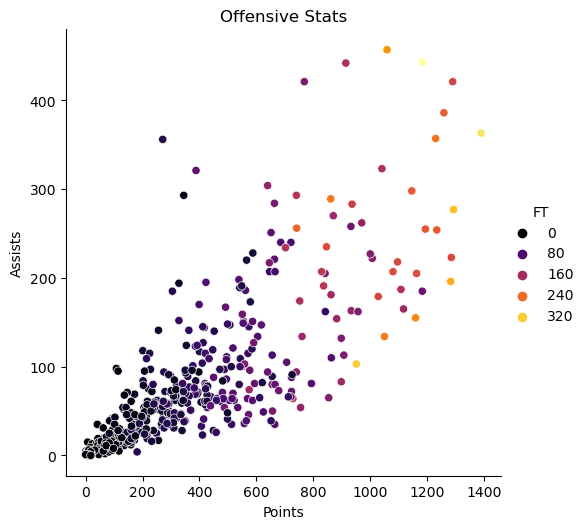

In [179]:
ax = sns.relplot(x = 'PTS', y = 'AST', hue = 'FT', data = ss, palette = 'inferno')
plt.title('Offensive Stats')
ax.set(xlabel = "Points", ylabel = "Assists")

As we can see, one of those players is Trae Young. He is actually in one of the best spots in terms of assists, free throws and points. We can see that Draymond Green has a lot of value for assists, especially at his position. So far in our graphs, we have consistently seen Kevin Love, P.J Tucker, LaMarcus Aldridge and Blake Griffin in the bottom of these plots, all players who make above league average.

Text(228    541.0
Name: PTS, dtype: float64, 228    82
Name: AST, dtype: int64, 'Kuz')

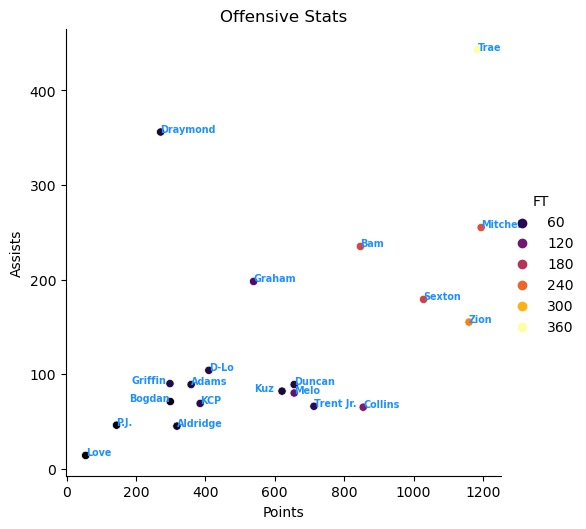

In [180]:
ax = sns.relplot(x = 'PTS', y = 'AST', hue = 'FT', data = ss_bb_aa, palette = 'inferno')
plt.title('Offensive Stats')
ax.set(xlabel = "Points", ylabel = "Assists")
aa_names = ['Steven Adams','LaMarcus Aldridge','Kentavious Caldwell-Pope','Draymond Green','Kevin Love',"D'Angelo Russell",'P.J. Tucker','Zion Williamson', 'Bam Adebayo', 'Carmelo Anthony', 'John Collins', "Devonte' Graham", 'Donovan Mitchell', 'Duncan Robinson', 'Collin Sexton', 'Gary Trent Jr.', 'Trae Young']
nick = ['Adams','Aldridge','KCP','Draymond','Love','D-Lo','P.J.','Zion', 'Bam', 'Melo', 'Collins', 'Graham', 'Mitchell', 'Duncan', 'Sexton', 'Trent Jr.', 'Trae']
for i,j in zip(aa_names, nick):
    plt.text(ss_bb_aa['PTS'][ss_bb_aa.player_name == i], ss_bb_aa['AST'][ss_bb_aa.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small')
plt.text(ss_bb_aa['PTS'][ss_bb_aa.player_name == 'Blake Griffin']-110.0, ss_bb_aa['AST'][ss_bb_aa.player_name == 'Blake Griffin'], 'Griffin', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa['PTS'][ss_bb_aa.player_name == 'Bogdan Bogdanović']-120.0, ss_bb_aa['AST'][ss_bb_aa.player_name == 'Bogdan Bogdanović'], 'Bogdan', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 
plt.text(ss_bb_aa['PTS'][ss_bb_aa.player_name == 'Kyle Kuzma']-80.0, ss_bb_aa['AST'][ss_bb_aa.player_name == 'Kyle Kuzma'], 'Kuz', color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small') 

Below we have defensive stats for the league which although aren't flashy, are important.

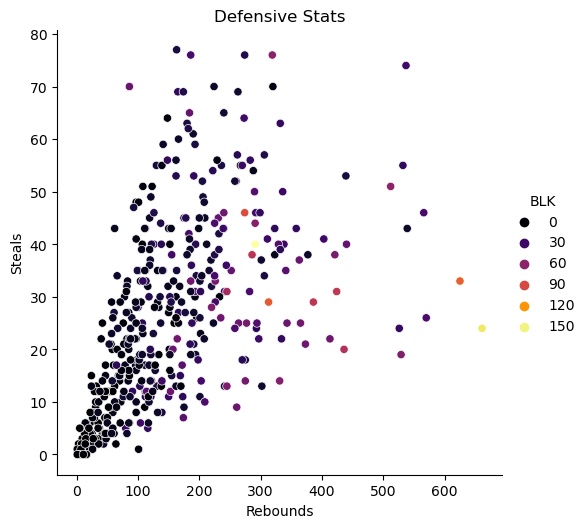

In [181]:
ax = sns.relplot(x = 'TRB', y = 'STL', hue = 'BLK', data = ss, palette = 'inferno')
plt.title('Defensive Stats')
ax.set(xlabel = "Rebounds", ylabel = "Steals")

This is where some of the players such as Draymond Green and Steven Adams really show their value. We also see that John Collins and Bam Adebayo rank high in rebounds and blocks and Bam as well in steals.

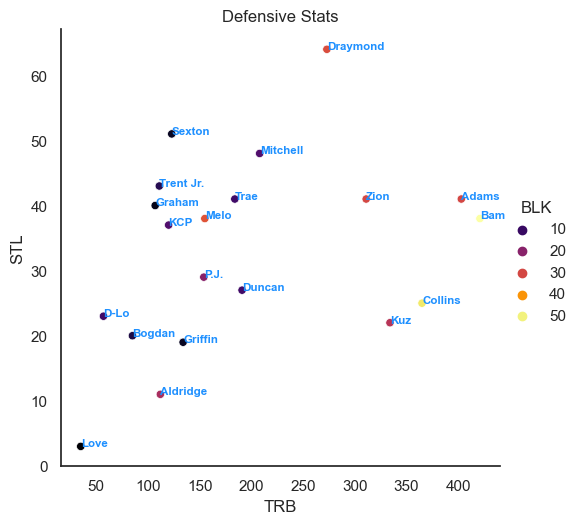

In [131]:
ax = sns.relplot(x = 'TRB', y = 'STL', hue = 'BLK', data = ss_bb_aa, palette = 'inferno')
plt.title('Defensive Stats')
ax.set(xlabel = "Rebounds", ylabel = "Steals")
aa_names = ['Steven Adams','LaMarcus Aldridge','Bogdan Bogdanović','Kentavious Caldwell-Pope','Draymond Green','Blake Griffin','Kevin Love',"D'Angelo Russell",'P.J. Tucker','Zion Williamson', 'Bam Adebayo', 'Carmelo Anthony', 'John Collins', "Devonte' Graham", 'Kyle Kuzma', 'Donovan Mitchell', 'Duncan Robinson', 'Collin Sexton', 'Gary Trent Jr.', 'Trae Young']
nick = ['Adams','Aldridge','Bogdan','KCP','Draymond','Griffin','Love','D-Lo','P.J.','Zion', 'Bam', 'Melo', 'Collins', 'Graham', 'Kuz', 'Mitchell', 'Duncan', 'Sexton', 'Trent Jr.', 'Trae']
for i,j in zip(aa_names, nick):
    plt.text(ss_bb_aa['TRB'][ss_bb_aa.player_name == i], ss_bb_aa['STL'][ss_bb_aa.player_name == i], j, color = 'dodgerblue', fontweight = 'semibold', fontstretch = 'extra-condensed', fontsize = 'x-small')
    

In [43]:
pd.set_option('display.max_columns', None)
ss.sort_values(by = 'FT', ascending = False).head(20)
pd.set_option('display.max_rows', 20)

Now we take a look at which stats have high correlation with higher salary. As we would expect many categories are highly correlated with each other. For example points are highly correlated with all scoring categories because points is a dependent variable, dependent on field goals, three points and free throws. As expected points, assists and free throws had moderate correlation. Turnovers also had moderate correlation, I think this is due to usage rate. The more a player plays and has the ball in their hands, the more they will turn the ball over even though this a stat you would like to have less of. I purposely left out games played because I'm curious if the prediction models will disagree with the actual result due to a player essentially having injuries.

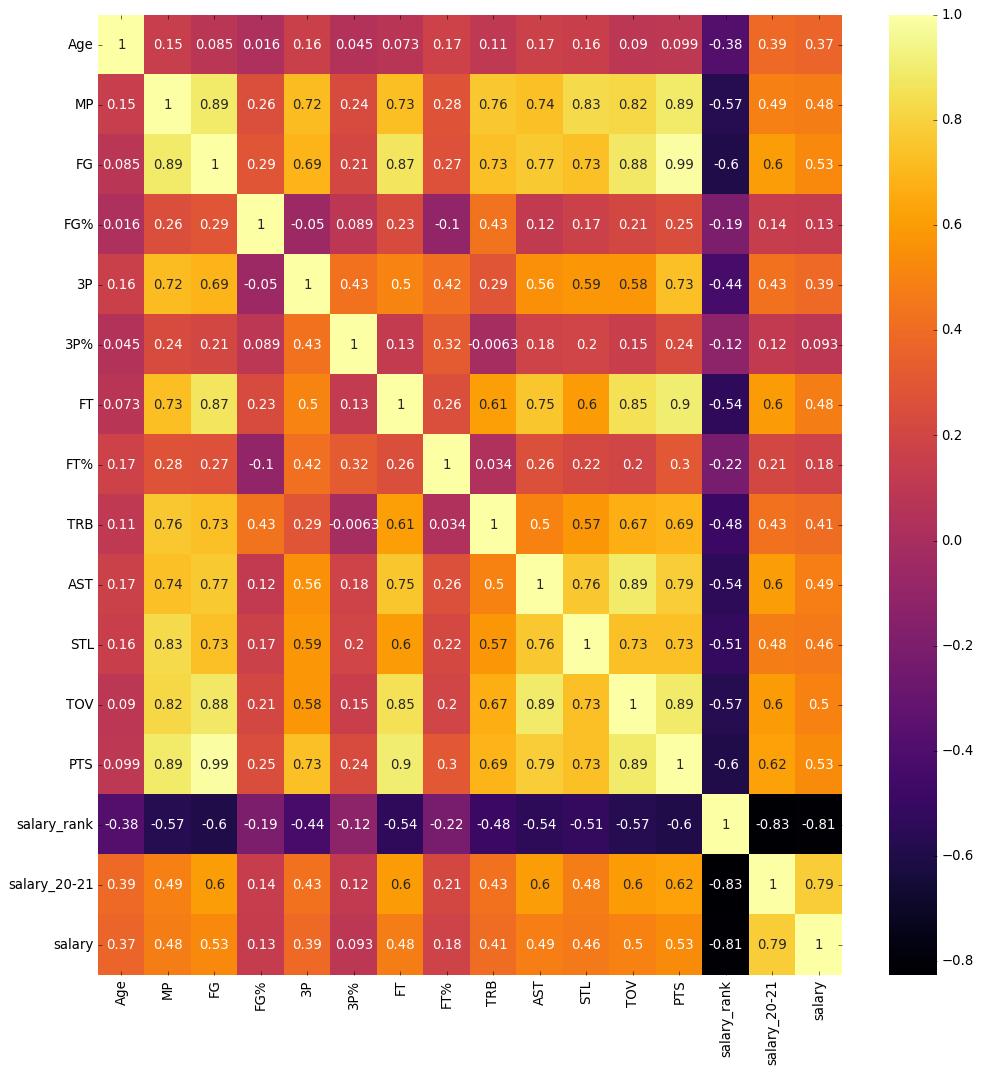

In [47]:
ss_corr = ss.loc[:,['Age','MP','FG','FG%', '3P', '3P%', 'FT', 'FT%', 'TRB', 'AST', 'STL','TOV', 'PTS', 'salary_rank', 'salary_20-21', 'salary']]
heat = plt.figure(figsize =(15,15))
sns.heatmap(ss_corr.corr(), cmap = 'inferno', annot = True)
heat.set_facecolor('white')

Here, I begin to separate my test and training data. I included the independent variables of X for my models to base their predictions off of.

In [48]:
X = ss[['Age','MP','FG','FG%', '3P', '3P%', 'FT', 'FT%', 'TRB', 'AST', 'STL','TOV', 'PTS']]
y = ss['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state = 1)

In [49]:
print("Number of Rows X_train dataset : ", X_train.shape)
print("Number of Rows y_train dataset : ", y_train.shape)
print("Number of Rows X_train dataset : ", X_test.shape)
print("Number of Rows y_train dataset : ", y_test.shape)

Number of Rows X_train dataset :  (311, 13)
Number of Rows y_train dataset :  (311,)
Number of Rows X_train dataset :  (128, 13)
Number of Rows y_train dataset :  (128,)


I used several different models, to see which one did best and the best one is the one I will use to make official predictions. 

In [50]:
models = []
models.append(['Logistic Regression', LogisticRegression(random_state=0, max_iter = 1000)])
models.append(['Random Forest Regressor',RandomForestClassifier(n_estimators = 106, random_state = 1)])
models.append(['SVM', SVC(random_state=5)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=5)])
models.append(['Extra Tree', ExtraTreesClassifier(random_state=5)])
models.append(['AdaBoost', AdaBoostClassifier(random_state=5)])
models.append(['Gradient Boost', GradientBoostingClassifier(random_state=5)])



lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred, zero_division = 0)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regression :
[[80  7]
 [12 29]]
Accuracy Score:  0.8515625

K-Fold Validation Mean Accuracy: 79.73 %

Standard Deviation: 7.67 %

ROC AUC Score: 0.81

Precision: 0.81

Recall: 0.71

F1: 0.75
-----------------------------------

Random Forest Regressor :
[[81  6]
 [16 25]]
Accuracy Score:  0.828125

K-Fold Validation Mean Accuracy: 77.18 %

Standard Deviation: 6.16 %

ROC AUC Score: 0.77

Precision: 0.81

Recall: 0.61

F1: 0.69
-----------------------------------

SVM :
[[76 11]
 [21 20]]
Accuracy Score:  0.75

K-Fold Validation Mean Accuracy: 74.29 %

Standard Deviation: 6.19 %

ROC AUC Score: 0.68

Precision: 0.65

Recall: 0.49

F1: 0.56
-----------------------------------

KNeighbors :
[[73 14]
 [20 21]]
Accuracy Score:  0.734375

K-Fold Validation Mean Accuracy: 71.74 %

Standard Deviation: 8.05 %

ROC AUC Score: 0.68

Precision: 0.60

Recall: 0.51

F1: 0.55
-----------------------------------

GaussianNB :
[[71 16]
 [15 26]]
Accuracy Score:  0.7578125

K-Fold Validation Me

C:\Users\wally\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BernoulliNB :
[[87  0]
 [41  0]]
Accuracy Score:  0.6796875

K-Fold Validation Mean Accuracy: 63.67 %

Standard Deviation: 1.33 %

ROC AUC Score: 0.50

Precision: 0.00

Recall: 0.00

F1: 0.00
-----------------------------------

Decision Tree :
[[73 14]
 [18 23]]
Accuracy Score:  0.75

K-Fold Validation Mean Accuracy: 69.51 %

Standard Deviation: 9.32 %

ROC AUC Score: 0.70

Precision: 0.62

Recall: 0.56

F1: 0.59
-----------------------------------

Extra Tree :
[[80  7]
 [16 25]]
Accuracy Score:  0.8203125

K-Fold Validation Mean Accuracy: 80.71 %

Standard Deviation: 4.33 %

ROC AUC Score: 0.76

Precision: 0.78

Recall: 0.61

F1: 0.68
-----------------------------------

AdaBoost :
[[78  9]
 [10 31]]
Accuracy Score:  0.8515625

K-Fold Validation Mean Accuracy: 77.50 %

Standard Deviation: 5.55 %

ROC AUC Score: 0.83

Precision: 0.78

Recall: 0.76

F1: 0.77
-----------------------------------

Gradient Boost :
[[77 10]
 [14 27]]
Accuracy Score:  0.8125

K-Fold Validation Mean Accurac

The models that did the best were the Logistic Regression and AdaBoost models. AdaBoost had a lower standard deviation which is what we want but I thought I'd go with Logistic Regression because I'm a bit more familiar with it. The Logistic Regression model got 85% correct which is excellent!

In [51]:
model_accuracy_df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
model_accuracy_df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
model_accuracy_df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regression,85.15625,79.727823,7.669569,0.813429,0.805556,0.707317,0.753247
8,AdaBoost,85.15625,77.500000,5.545784,0.826325,0.775000,0.756098,0.765432
1,Random Forest Regressor,82.81250,77.177419,6.163422,0.770395,0.806452,0.609756,0.694444
7,Extra Tree,82.03125,80.705645,4.331676,0.764648,0.781250,0.609756,0.684932
9,Gradient Boost,81.25000,75.887097,8.052006,0.771797,0.729730,0.658537,0.692308
4,GaussianNB,75.78125,77.167339,6.530710,0.725119,0.619048,0.634146,0.626506
2,SVM,75.00000,74.294355,6.191355,0.680684,0.645161,0.487805,0.555556
6,Decision Tree,75.00000,69.506048,9.323725,0.700028,0.621622,0.560976,0.589744
3,KNeighbors,73.43750,71.743952,8.053931,0.675638,0.600000,0.512195,0.552632
5,BernoulliNB,67.96875,63.669355,1.330645,0.500000,0.000000,0.000000,0.000000


I then took a deeper look at just how accurate our logistic regression model was. It only predicted 19 incorrect values. However the interesting part of this entire exercise is to be able to look at the players that our model disagreed with. This is the subset of players that our model has determined, the player either outperformed his contract or underperformed his contract.

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        87
           1       0.81      0.71      0.75        41

    accuracy                           0.85       128
   macro avg       0.84      0.81      0.82       128
weighted avg       0.85      0.85      0.85       128

ROC AUC Score: 0.888421642837118
Accuracy: 0.8515625


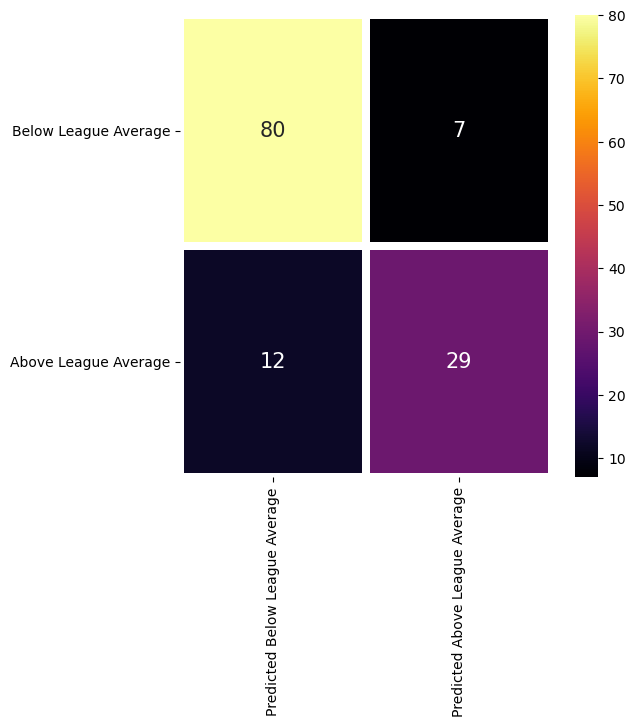

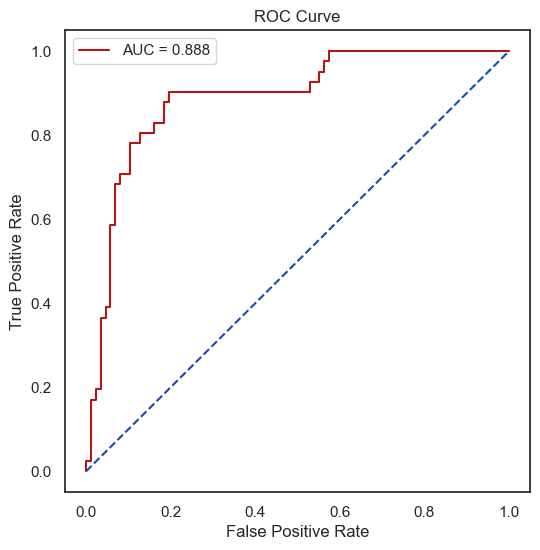

<Figure size 600x600 with 0 Axes>

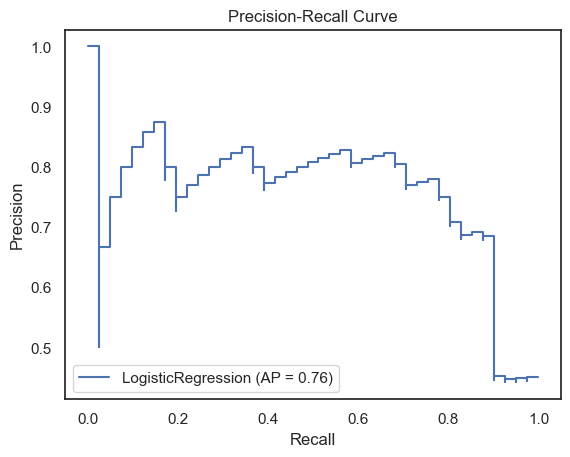

In [52]:
clf = LogisticRegression(random_state=0, max_iter = 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_prob = clf.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (6,6))
sns.heatmap(cm, cmap = 'inferno', annot = True, fmt = 'd', linewidths = 5, cbar = True, annot_kws = {'fontsize': 15}, yticklabels= ['Below League Average','Above League Average'], xticklabels= ['Predicted Below League Average', 'Predicted Above League Average'])
plt.yticks(rotation = 0)
plt.show()

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6,6))
plt.plot(false_positive_rate, true_positive_rate, color = '#b01717', label = 'AUC = %0.3f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize = (6,6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(clf, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

Seeing as I was happy with the model, I decided to generate predictions for the entire dataset and add those predictions as a column 'y_pred' in our ss dataset.

In [195]:
y_pred = clf.predict(X)
ss['y_pred'] = y_pred
print('Accuracy Score: ',accuracy_score(y, y_pred))

Accuracy Score:  0.8154897494305239


I found an inconsistency in the dataset provided by basketballrefrence.com. Nicolas Batum had his salary_rank at 303. His salary_rank should be at 108 in between Larry Nance Jr. and Jordan Clarkson.

In [199]:
pd.set_option('display.max_rows', 30)
pred_vs_actual = np.where((ss['salary'] != ss['y_pred']))
pred_wrong = ss.loc[pred_vs_actual]
pred_wrong_twenty = pred_wrong.loc[[2, 11, 84, 147, 228, 278, 368, 436, 1, 44, 69, 245, 360, 398]]
ss_bb_aa_subset = ss_bb_aa[['player_name', 'salary_20-21', 'salary', 'y_pred']]
ss_bb_aa_subset.to_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\blog post\\ss bb aa subset.csv')

    So what did our prediction model come up with? It reached 72% accuracy which is ok but part of that inaccuracy is that players don't always play up to the potential they are paid for and this is where it gets interesting. I created a dataframe of players where our prediction disagreed. Ideally we want our subset to be full of players that we can say for sure that they outperformed or underperformed their contract. How many of our 20 players were in this subset? It turns out 14 of our 20 players are in this subset. Although our prediction only reached 72% accuracy, it seems it was much better at determining who _should_ be making above or below league average.
    Some of our suspected players that we thought were making too much were in this subset. Kevin Love and P.J. Tucker namely as well as D'Angelo Russell and Kentavious-Caldwell Pope. Due to low stat totals the prediction model determined that they were not making above league average.
    Many of our top performers also showed up in our subset. Trae Young, Donovan Mitchell and Bam Adebayo all were determined by the prediction model to be making more than league average.
    Well what happened to the other seven? The prediction model agreed that based on their stats they should be making above league average. Players like Blake Griffin and LaMarcus Aldridge although low games played and low stat totals were deemed to have earned their money so to speak. However there were other players like Draymond Green who you feel much better saying that he should be making above league average. The sample set I chose was full of players that could've gone either way. So how can we determine this data then? Below I created two subsets from our subset of players where the prediction model disagreed. One subset is the players who overperformed and the other is players who underperformed? Who played better? 

In [197]:
outperformed = pred_wrong[pred_wrong['y_pred']== 1]
underperformed = pred_wrong[pred_wrong['y_pred']== 0]
print(len(outperformed))
print(len(underperformed))
pred_wrong_twenty

31
50


,Rk,player_name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary_rank,salary_20-21,salary_21-22,signed_using,guaranteed_money,salary,y_pred
2,4,Bam Adebayo,C,23,MIA,44,44,1480,317,564,0.562,2,8,0.250,315,556,0.567,0.564,211,253,0.834,105,316,421,235,38,52,118,97,847,200,5115492,28103550,1st Round Pick,168116082.0,0,1
11,15,Carmelo Anthony,PF,36,POR,48,3,1233,234,564,0.415,84,220,0.382,150,344,0.436,0.489,104,120,0.867,25,130,155,80,38,32,49,107,656,298,2564753,0,Minimum Salary,2564753.0,0,1
84,99,John Collins,PF,23,ATL,47,47,1422,333,611,0.545,60,158,0.380,273,453,0.603,0.594,129,154,0.838,98,267,365,65,25,49,57,152,855,232,4137302,0,1st Round Pick,4137302.0,0,1
147,171,Devonte' Graham,PG,25,CHO,39,33,1161,168,451,0.373,115,309,0.372,53,142,0.373,0.500,88,106,0.830,17,90,107,198,40,3,58,53,539,400,1663861,0,NaN,NaN,0,1
228,264,Kyle Kuzma,SF,25,LAL,49,19,1366,241,549,0.439,97,271,0.358,144,278,0.518,0.527,42,66,0.636,90,244,334,82,22,26,85,84,621,255,3562178,13000000,1st Round Pick,29562178.0,0,1
278,327,Donovan Mitchell,SG,24,UTA,47,47,1570,408,937,0.435,159,402,0.396,249,535,0.465,0.520,220,261,0.843,46,162,208,255,48,13,133,102,1195,199,5195501,28103550,1st Round Pick,131099405.0,0,1
368,427,Collin Sexton,SG,22,CLE,43,43,1542,378,790,0.478,69,192,0.359,309,598,0.517,0.522,204,250,0.816,33,90,123,179,51,4,117,117,1029,210,4991880,6349671,1st Round Pick,11341551.0,0,1
436,509,Trae Young,PG,22,ATL,47,47,1611,357,828,0.431,110,307,0.358,247,521,0.474,0.498,361,414,0.872,32,152,184,443,41,11,205,93,1185,174,6571800,8326471,1st Round Pick,14898271.0,0,1
1,3,Steven Adams,C,27,NOP,45,45,1268,156,250,0.624,0,3,0.000,156,247,0.632,0.624,47,105,0.448,176,227,403,89,41,30,67,93,359,39,27528090,17073171,1st Round Pick,62528090.0,1,0
44,52,Bogdan Bogdanović,SG,28,ATL,25,8,637,111,253,0.439,58,151,0.384,53,102,0.520,0.553,19,21,0.905,11,74,85,71,20,7,25,56,299,62,18000000,18000000,Cap Space,54000000.0,1,0


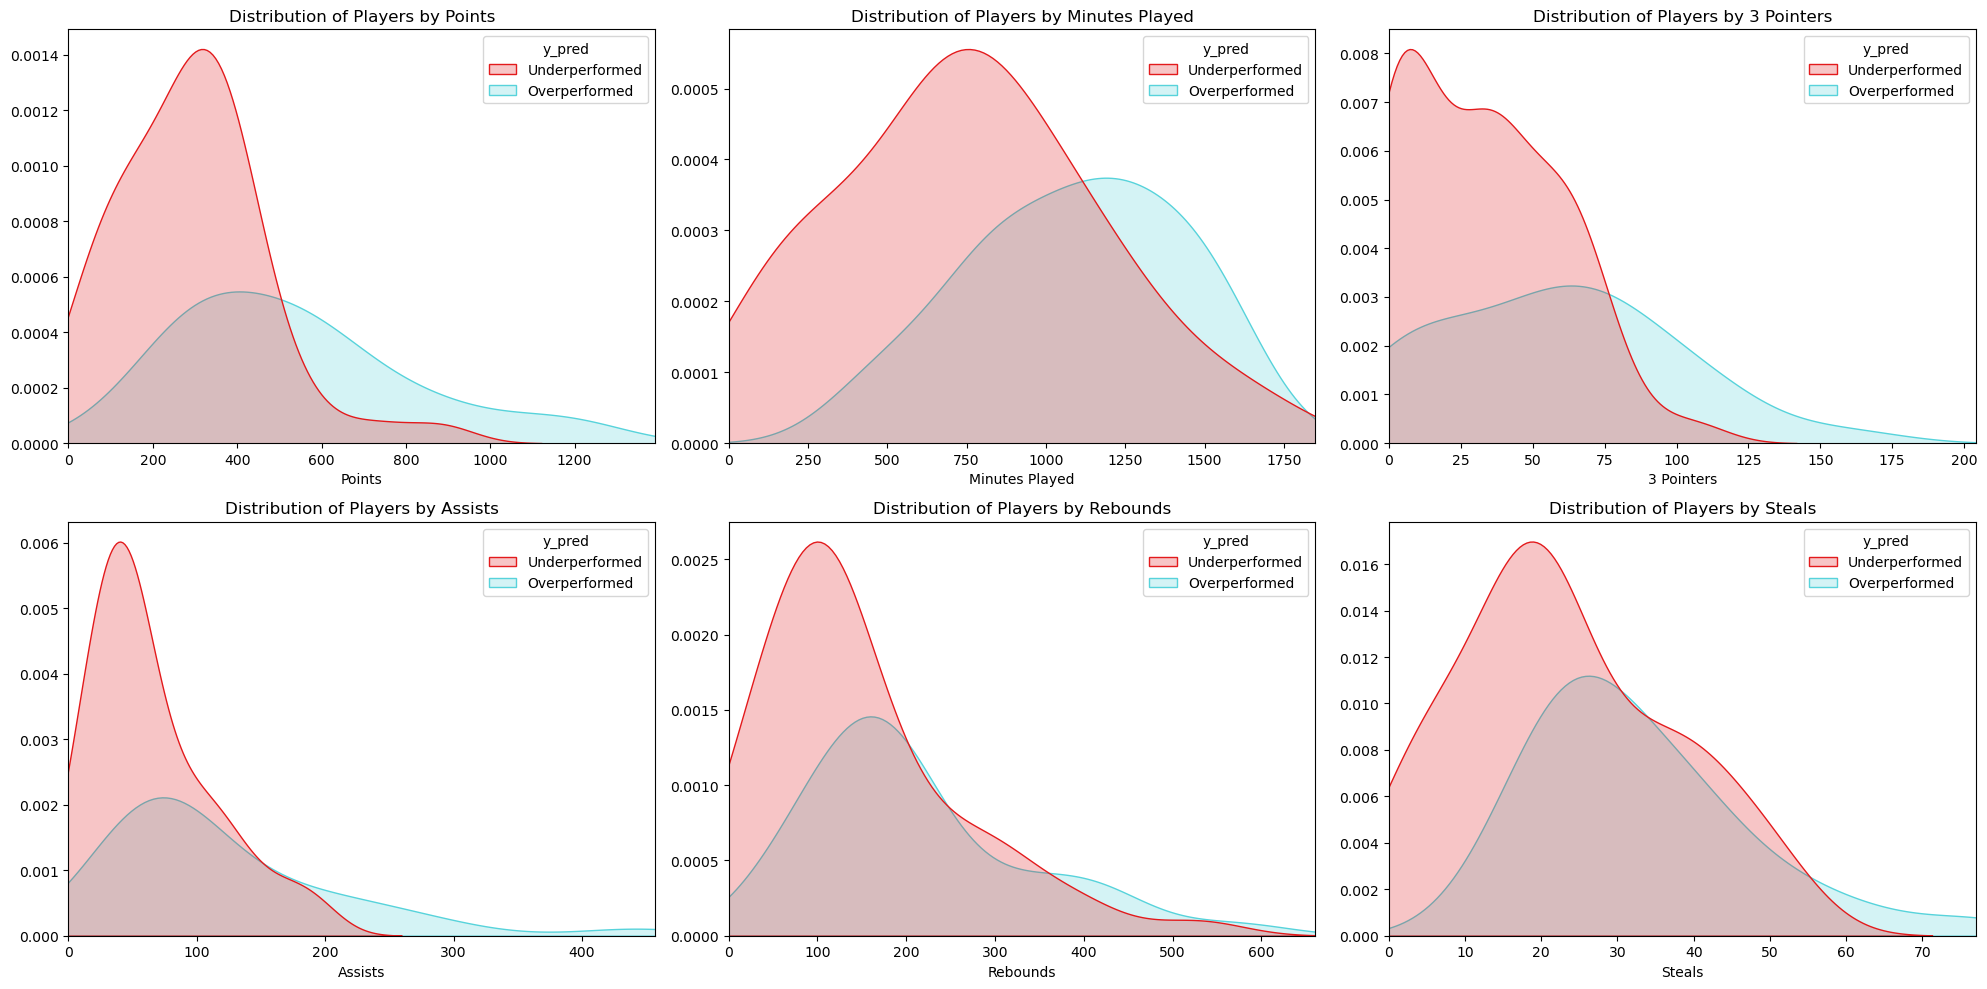

In [193]:
fig, axx = plt.subplots(2,3, figsize = (20,10))
legend_map = {0: 'Underperformed', 1: 'Overperformed'}

axx[0,0].set_title('Distribution of Players by Points')
sns.kdeplot(x = 'PTS', hue = pred_wrong['y_pred'].map(legend_map) , data = pred_wrong, ax = axx[0,0], shade = True,  palette = hlsg_r)
max_pts = ss['PTS'].max()
axx[0,0].set(xlim = (0,max_pts))
axx[0,0].set(xlabel = 'Points', ylabel = "")

axx[0,1].set_title('Distribution of Players by Minutes Played')
sns.kdeplot(x = 'MP', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[0,1], shade = True, palette = hlsg_r)
max_MP = ss['MP'].max()
axx[0,1].set(xlim = (0,max_MP))
axx[0,1].set(xlabel = 'Minutes Played', ylabel = "")

axx[0,2].set_title('Distribution of Players by 3 Pointers')
sns.kdeplot(x = '3P', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[0,2], shade = True, palette = hlsg_r)
max_3P = ss['3P'].max()
axx[0,2].set(xlim = (0,max_3P))
axx[0,2].set(xlabel = '3 Pointers', ylabel = "")

axx[1,0].set_title('Distribution of Players by Assists')
sns.kdeplot(x = 'AST', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[1,0], shade = True, palette = hlsg_r)
max_AST = ss['AST'].max()
axx[1,0].set(xlim = (0,max_AST))
axx[1,0].set(xlabel = 'Assists', ylabel = "")

axx[1,1].set_title('Distribution of Players by Rebounds')
sns.kdeplot(x = 'TRB', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[1,1], shade = True, palette = hlsg_r)
max_TRB = ss['TRB'].max()
axx[1,1].set(xlim = (0,max_TRB))
axx[1,1].set(xlabel = 'Rebounds', ylabel = "")

axx[1,2].set_title('Distribution of Players by Steals')
sns.kdeplot(x = 'STL', hue = pred_wrong['y_pred'].map(legend_map), data = pred_wrong, ax = axx[1,2], shade = True, palette = hlsg_r)
max_STL = ss['STL'].max()
axx[1,2].set(xlim = (0,max_STL))
axx[1,2].set(xlabel = 'Steals', ylabel = "")

fig.set_facecolor('white')
plt.tight_layout()

As we can see the players, who the prediction model said _should_ be making more than league average outperformed their counterparts who were deemed _should_ be making less. It should be noted that the subset of 'overperformers' was 30 players and 'underperformers' was 51 players. This is why all the red curves are taller. It was easier for the prediction model to find players who didn't contribute much and therefore should be making less than it was to find players who were contributing more than their salary value. We can also see that the prediction model valued points, three pointers and indirectly minutes played as important to salary. Conversely, assists, rebounds and steals weren't nearly as important.

Conclusion:
We can conclude that player stats are good at predicting which players earn above league average. We can also use predictive models to perhaps measure whether players overperformed or underperformed for previous years and if there's a pattern, perhaps we can use this information to anticipate whether a player will earn their entire contract. Injuries obviously must also be taken into account and can explain outlier years. There are many players where it is difficult to judge what their value should be and although a player may demand more money than he is worth due to the market being in demand for his services, at least an organization can go into a situation knowing whether they will be overpaying or underpaying or if they have overpaid or underpaid and whether or not to extend a player at a certain premium.

Thank you for reading! -Walter